In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Birth Year Distributions

In [3]:
#importing our prepared file into a pandas dataframe with appropriate column names
registration = pd.read_csv('/home/dataguy/registration/registration.csv', delimiter = ' ', names = ['day','date','time','user_id','event','birth_year','phone_type','country','source'])

In [4]:
registration.head()

,day,date,time,user_id,event,birth_year,phone_type,country,source
0,day_1,2019-09-13,00:32:11,1000001,registration,1983,android,sweden,invite_a_friend
1,day_1,2019-09-13,00:55:42,1000002,registration,1986,ios,united_states,invite_a_friend
2,day_1,2019-09-13,01:05:20,1000003,registration,1989,error,sweden,invite_a_friend
3,day_1,2019-09-13,01:23:24,1000004,registration,1994,error,germany,invite_a_friend
4,day_1,2019-09-13,01:24:16,1000005,registration,1986,ios,united_states,invite_a_friend


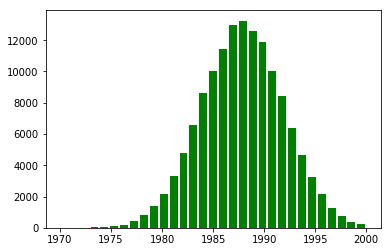

In [5]:
#building a histogram using matplotlib package
plt.hist(registration.birth_year, bins = 31, histtype = 'bar', rwidth = 0.8, color = 'g')
plt.show()

In [6]:
registration.birth_year.describe()

count    138316.000000
mean       1987.952984
std           4.176140
min        1970.000000
25%        1985.000000
50%        1988.000000
75%        1991.000000
max        2000.000000
Name: birth_year, dtype: float64

In [7]:
#Now we can see that the registrants' birth year distribution reminds a normal distribution around the mean of 1987.95
#Let's see if the distribution looks the same in free tree and super tree senders

In [8]:
free_tree = pd.read_csv('/home/dataguy/free_tree/free_tree.csv', delimiter = ' ', names = ['day','date','user_id','event'])
super_tree = pd.read_csv('/home/dataguy/super_tree/super_tree.csv', delimiter = ' ', names = ['day','date','user_id','event'])

In [9]:
free_tree.head()

,day,date,user_id,event
0,day_1,2019-09-13,1000100,sent_a_free_tree
1,day_1,2019-09-13,1000096,sent_a_free_tree
2,day_1,2019-09-13,1000037,sent_a_free_tree
3,day_1,2019-09-13,1000037,sent_a_free_tree
4,day_1,2019-09-13,1000037,sent_a_free_tree


In [10]:
#merging the free tree and registration dataframes to collect all the data about free tree senders in one dataframe
free_full = registration.merge(free_tree, on = 'user_id')

In [11]:
free_full.head()

,day_x,date_x,time,user_id,event_x,birth_year,phone_type,country,source,day_y,date_y,event_y
0,day_1,2019-09-13,00:32:11,1000001,registration,1983,android,sweden,invite_a_friend,day_1,2019-09-13,sent_a_free_tree
1,day_1,2019-09-13,00:32:11,1000001,registration,1983,android,sweden,invite_a_friend,day_1,2019-09-13,sent_a_free_tree
2,day_1,2019-09-13,00:32:11,1000001,registration,1983,android,sweden,invite_a_friend,day_1,2019-09-13,sent_a_free_tree
3,day_1,2019-09-13,00:32:11,1000001,registration,1983,android,sweden,invite_a_friend,day_2,2019-09-14,sent_a_free_tree
4,day_1,2019-09-13,00:32:11,1000001,registration,1983,android,sweden,invite_a_friend,day_4,2019-09-16,sent_a_free_tree


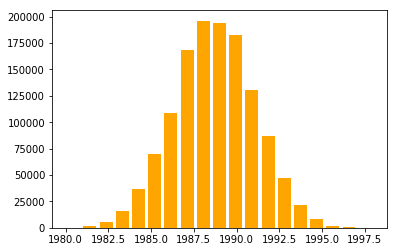

In [12]:
plt.hist(free_full.birth_year, bins = 19, histtype = 'bar', rwidth = 0.8, color = 'orange')
plt.show()

In [13]:
free_full.birth_year.describe()

count    1.278069e+06
mean     1.988683e+03
std      2.498102e+00
min      1.980000e+03
25%      1.987000e+03
50%      1.989000e+03
75%      1.990000e+03
max      1.998000e+03
Name: birth_year, dtype: float64

In [14]:
#the free tree senders distribution also reminds a normal distribution with the mean 1988.68, which is similat to the registrants' mean. 
#However, the dispersion is of birth years is lower here. 

In [15]:
super_full = registration.merge(super_tree, on = 'user_id')

In [16]:
super_full.head()

,day_x,date_x,time,user_id,event_x,birth_year,phone_type,country,source,day_y,date_y,event_y
0,day_1,2019-09-13,01:34:53,1000007,registration,1994,android,sweden,invite_a_friend,day_1,2019-09-13,sent_a_super_tree
1,day_1,2019-09-13,02:07:31,1000010,registration,1993,error,brazil,invite_a_friend,day_1,2019-09-13,sent_a_super_tree
2,day_1,2019-09-13,02:07:31,1000010,registration,1993,error,brazil,invite_a_friend,day_2,2019-09-14,sent_a_super_tree
3,day_1,2019-09-13,02:07:31,1000010,registration,1993,error,brazil,invite_a_friend,day_2,2019-09-14,sent_a_super_tree
4,day_1,2019-09-13,02:07:31,1000010,registration,1993,error,brazil,invite_a_friend,day_2,2019-09-14,sent_a_super_tree


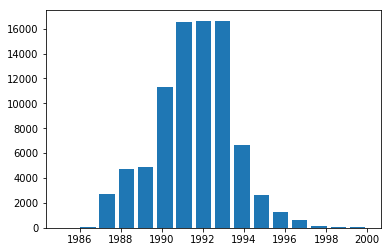

In [17]:
plt.hist(super_full.birth_year, bins = 16, histtype = 'bar', rwidth = 0.8)
plt.show()

In [18]:
super_full.birth_year.describe()

count    84837.000000
mean      1991.543077
std          2.021193
min       1985.000000
25%       1990.000000
50%       1992.000000
75%       1993.000000
max       2000.000000
Name: birth_year, dtype: float64

In [19]:
#We can observe that the super tree senders on average are somewhat younger than free tree senders and all registrants.
#We also can observe a lower dispersion than in the registrants' and free tree senders' distributions.

# Further Segmentation (Birth Years Added)

In [20]:
registration.groupby(['birth_year','country','source','phone_type']).count().sort_values(by = ['day'], ascending = False)[['day']].head(20)

,,,,day
birth_year,country,source,phone_type,
1987,united_states,invite_a_friend,android,1555
1988,united_states,invite_a_friend,android,1494
1989,united_states,invite_a_friend,android,1475
1990,united_states,invite_a_friend,android,1424
1988,united_states,invite_a_friend,error,1422
1989,united_states,invite_a_friend,error,1344
1987,united_states,invite_a_friend,error,1328
1986,united_states,invite_a_friend,android,1311
1990,united_states,invite_a_friend,error,1291


In [23]:
free_full.groupby(['birth_year','country','source','phone_type']).count().sort_values(by = ['day_x'], ascending = False)[['day_x']].head(20)

,,,,day_x
birth_year,country,source,phone_type,
1989,united_states,invite_a_friend,android,59741
1988,united_states,invite_a_friend,android,57612
1990,united_states,invite_a_friend,android,56975
1988,united_states,invite_a_friend,error,55801
1989,united_states,invite_a_friend,error,54591
1987,united_states,invite_a_friend,android,53441
1990,united_states,invite_a_friend,error,51469
1987,united_states,invite_a_friend,error,45732
1991,united_states,invite_a_friend,android,38506


In [24]:
super_full.groupby(['birth_year','country','source','phone_type']).count().sort_values(by = ['day_x'], ascending = False)[['day_x']].head(20)

,,,,day_x
birth_year,country,source,phone_type,
1993,united_states,invite_a_friend,android,3793
1992,united_states,invite_a_friend,android,3635
1991,united_states,invite_a_friend,android,3479
1992,united_states,invite_a_friend,error,3341
1993,united_states,invite_a_friend,error,3278
1991,united_states,invite_a_friend,error,3252
1993,brazil,invite_a_friend,android,2957
1991,brazil,invite_a_friend,android,2901
1992,brazil,invite_a_friend,android,2747


In [ ]:
#The above subsegments are in line with our previous findings
#The users who pay for the super tree function are on average couple of years younger, than all registrants and free tree senders
#Our best source of revenue is the subsegment of people from the United Stated born in 1993 
#who use Android phones and have been invited by a friend to the app